
# APA Laboratori 0 - Data preprocessing


In [1]:
options(repr.plot.width=6, repr.plot.height=6)

<div class="alert alert-block alert-info">

**INSTRUCCIONS**

No cal entregar res, cal assimilar

S'ha de fer amb calma, sense córrer, mirant d'entendre en tot moment què s'està fent --a nivell conceptual-- i quin efecte té

 Podeu deixar el codi R en si (crides, paràmetres, sintaxi) per una segona lectura o com a treball personal. El codi R és un mitjà, no un objectiu.
</div>

## SECTION 1: READING THE FILE CREDSCO.TXT (loan data: credit scoring)

 Reading properly a data set is non-trivial because you need to know
 its data format: decimal separator, column separator, is there a
 header? how are strings quoted? how (if any) are missing values
 coded? should character vectors be converted to factors? should
 white spaces be stripped?, ...)

 It is a good idea to consult `?read.csv` and play with useful control parameters, like

` header=TRUE
 na.strings="?"
 dec = "."
 sep = ";"
 quote = "\"`

 .. and some others

 after opening the file `credsco.csv` and inspecting it, we decide the following settings:

In [2]:
Credit <- read.csv("credsco.csv", header = TRUE, quote = "\"", dec = ".", check.names=TRUE)

the dimensions of the data set are 

In [3]:
dim(Credit)

[1] 4455   14

which means 4,455 examples described by 14 variables

 Basic questions:

* Which is the target variable? where is it? how many different values? is it a classification problem or a regression problem?

* *answers:* the target variable is located in column 1 and is called 'Assessment'; it has two possible values (therfore it is a classification problem)

What are the other variables?

In [4]:
names(Credit)

[1] "Assessment"       "YearsInJob"       "Housing"          "Deadline"        
 [5] "Age"              "MaritalStatus"    "Records"          "TypeOfJob"       
 [9] "Expenses"         "Income"           "Capital"          "ChargesOnCapital"
[13] "AmountRequested"  "MarketPrice"

 You can consult the file "Credsco-traduccions.txt" for translation into Catalan

inspect the first 4 examples

In [5]:
Credit[1:4,]

Assessment,YearsInJob,Housing,Deadline,Age,MaritalStatus,Records,TypeOfJob,Expenses,Income,Capital,ChargesOnCapital,AmountRequested,MarketPrice
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325


inspect predictive variables 4, 5, 6 and 7 for the first example

In [6]:
Credit[1,5:8]

Age,MaritalStatus,Records,TypeOfJob
30,2,1,3


***
## SECTION 2: BASIC INSPECTION OF THE DATASET

Perform a basic inspection of the dataset. Have a look at the minimum and maximum values for each variable; find possible errors and abnormal values (outliers); find possible missing values; decide which variables are continuous and which are categorical; if there are mixed types, we have three options: recode continuous to categorical, recode categorical to continuous or leave them as they are. In the latter case, either the method accepts both kinds of information, or it does not, in which case R will convert the categorical ones to continuous using a dummy code.

In [7]:
summary(Credit)

   Assessment      YearsInJob        Housing         Deadline    
 Min.   :0.000   Min.   : 0.000   Min.   :0.000   Min.   : 6.00  
 1st Qu.:1.000   1st Qu.: 2.000   1st Qu.:2.000   1st Qu.:36.00  
 Median :1.000   Median : 5.000   Median :2.000   Median :48.00  
 Mean   :1.281   Mean   : 7.987   Mean   :2.657   Mean   :46.44  
 3rd Qu.:2.000   3rd Qu.:12.000   3rd Qu.:4.000   3rd Qu.:60.00  
 Max.   :2.000   Max.   :48.000   Max.   :6.000   Max.   :72.00  
      Age        MaritalStatus      Records        TypeOfJob    
 Min.   :18.00   Min.   :0.000   Min.   :1.000   Min.   :0.000  
 1st Qu.:28.00   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :36.00   Median :2.000   Median :1.000   Median :1.000  
 Mean   :37.08   Mean   :1.879   Mean   :1.174   Mean   :1.676  
 3rd Qu.:45.00   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :68.00   Max.   :5.000   Max.   :2.000   Max.   :4.000  
    Expenses          Income            Capital         ChargesOnCapital  
 Min.   

 Assessment,Housing,MaritalStatus,Records,TypeOfJob are categorical and need to be treated properly

 In particular, Assessment is the target variable; we need to identify correct values

 Capital, ChargesOnCapital and Income present abnormally high maximums (99999999)

 There are also suspicious zeros, in both types of variables, which we identify with missing values

## SECTION 3: DEALING WITH MISSING VALUES

Sometimes we need to take a decision on a sensible treatment for the missing values and apply it; it is wise to write down the possible consequences of this decision and the alternatives that could be considered in case the final results are not satisfactory

the easiest way is of course to eliminate the involved rows or
columns; this can be done partially. For example, we could decide to
eliminate the variables with the highest proportion of missing values.

Deleting instances and/or variables containing missing values results
in loss of relevant data and is also frustrating because of the effort
in collecting the sacrificed information.

<div class="alert alert-block alert-warning">
CAREFUL! R does not know magically which entries are missing values: they have to be explicitly declared as NA's
</div>

therefore this code is not useful:

In [8]:
?na.omit

Credit.complete <- na.omit(Credit)
dim(Credit.complete)

[1] 4455   14

 the previous code does nothing! (but it seems it does)

 In the present case we have decided to perform a step-by-step treatment, separate for the categorical and continuous information

 We first decide to remove those rows with with missing values in the categorical variables (there are few)

In [9]:
table(Credit[,1]==0)
table(Credit[,3]==0)
table(Credit[,6]==0)
table(Credit[,8]==0)

Credit <- Credit[Credit[,1] != 0 & Credit[,3] != 0 & Credit[,6] != 0 & Credit[,8] != 0,]

dim(Credit)


FALSE  TRUE 
 4454     1 


FALSE  TRUE 
 4449     6 


FALSE  TRUE 
 4454     1 


FALSE  TRUE 
 4453     2 

[1] 4446   14

 Process rows with missing values in the continuous variables (code 99999999)

In [10]:
# this allows the column names of Credit to be visible (use with care)
attach(Credit)

 look at that:

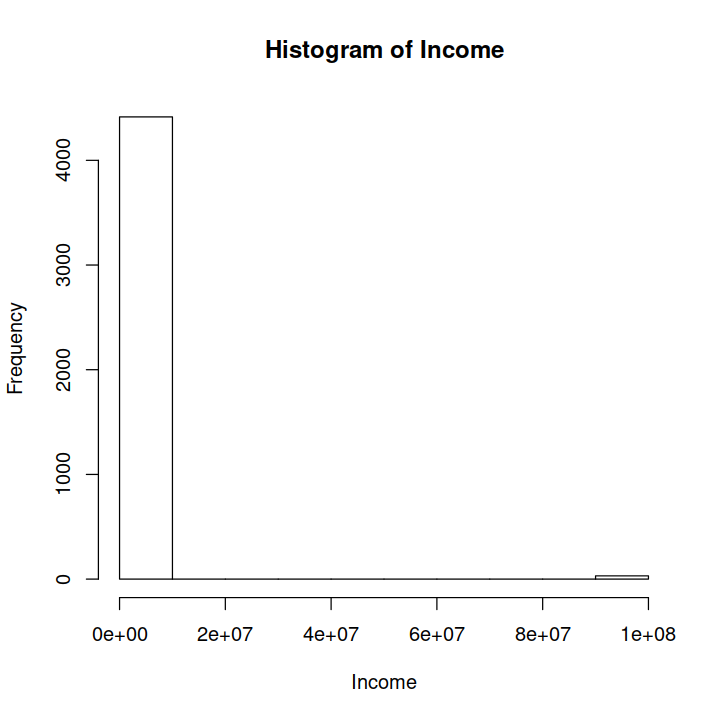

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
hist(Income)

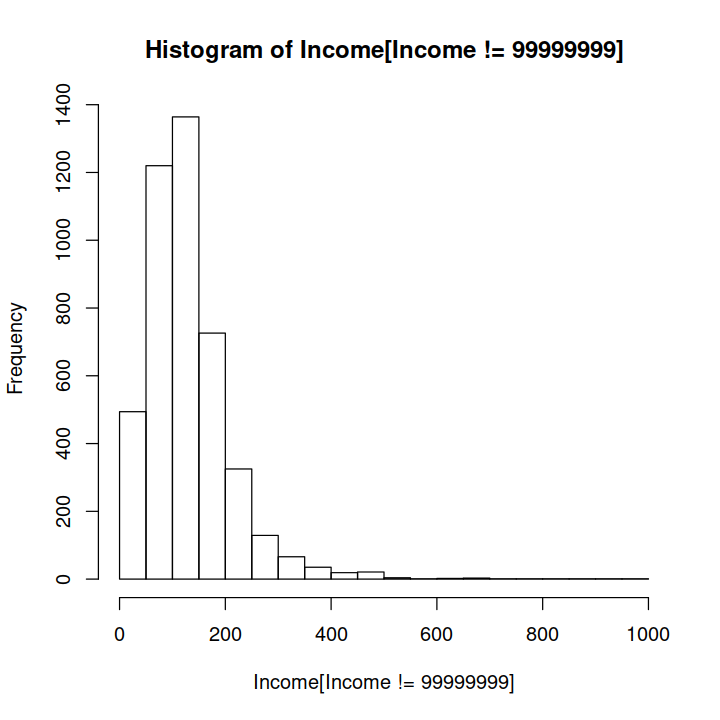

In [12]:
hist(Income[Income != 99999999])

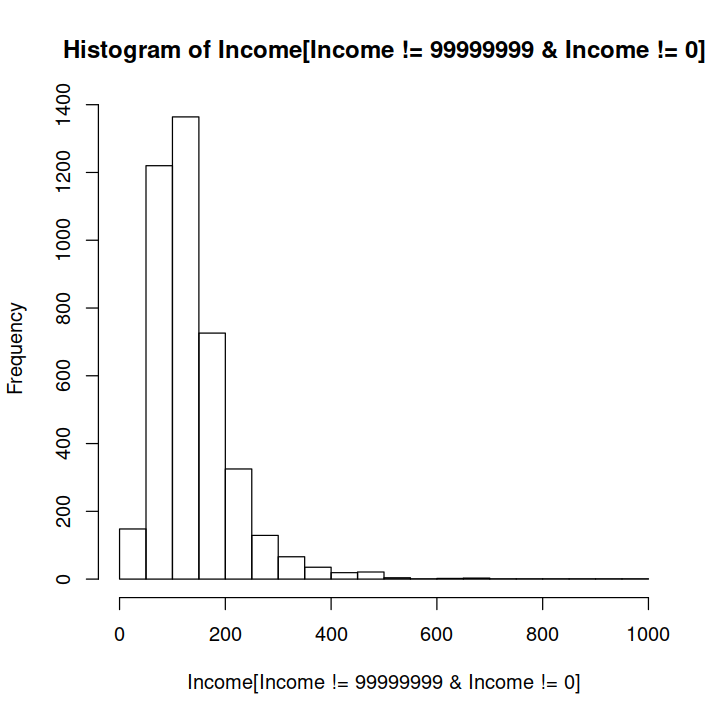

In [13]:
hist(Income[Income != 99999999 & Income != 0], breaks=15)

 these are then clearly incorrect

In [14]:
table(Income == 99999999)

table(Income == 0)

table(Capital == 99999999)

table(ChargesOnCapital == 99999999)


FALSE  TRUE 
 4415    31 


FALSE  TRUE 
 4100   346 


FALSE  TRUE 
 4405    41 


FALSE  TRUE 
 4434    12 

 what do we do with this one? let's assume it is correct

In [15]:
table(YearsInJob == 0)


FALSE  TRUE 
 3914   532 

 Continuous variables have too many missing values, we can not eliminate them just like that: we must devise a treatment for these missing values

 first we mark them to 'NA', including those from no 'Income'

In [16]:
Income[Income == 99999999 | Income == 0] <- NA
Capital[Capital == 99999999] <- NA
ChargesOnCapital[ChargesOnCapital == 99999999] <- NA

see the difference?

In [17]:
summary(Credit[,10])
summary(Income)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0       80      120   697386      166 99999999 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    6.0    90.0   125.0   141.7   170.0   959.0     377 

 The word 'imputation' refers to assigning a value to every missing value. Here we perform imputation by a method known as 1NN: for every individual with a missing 'Income', we look for the most similar individual (according to the remaining variables) and then copy its 'Income' value

In [18]:
library(class) # knn

 Imputation of 'Income'

In [19]:
aux <- Credit[,-10]
dim(aux)
aux1 <- aux[!is.na(Income),]
dim(aux1)
aux2 <- aux[is.na(Income),]
dim(aux2)

[1] 4446   13

[1] 4069   13

[1] 377  13

 Neither of aux1, aux2 can contain NAs

In [20]:
knn.inc <- knn(aux1,aux2,Income[!is.na(Income)])
Income[is.na(Income)] <- as.numeric(as.character(knn.inc))

 Imputation of 'Capital'

In [21]:
aux <- Credit[,-11]
aux1 <- aux[!is.na(Capital),]
aux2 <- aux[is.na(Capital),]
knn.cap <- knn(aux1,aux2,Capital[!is.na(Capital)])
Capital[is.na(Capital)] <- as.numeric(as.character(knn.cap))

Imputation of 'ChargesOnCapital'

In [22]:
aux <- Credit[,-12]
aux1 <- aux[!is.na(ChargesOnCapital),]
aux2 <- aux[is.na(ChargesOnCapital),]
knn.cac <- knn(aux1,aux2, ChargesOnCapital[!is.na(ChargesOnCapital)])
ChargesOnCapital[is.na(ChargesOnCapital)] <- as.numeric(as.character(knn.cac))

ChargesOnCapital[Capital==0] <- 0

assign back to the dataframe

In [23]:
Credit[,10] <- Income
Credit[,11] <- Capital
Credit[,12] <- ChargesOnCapital

 inspect again the result, especially the new statistics

In [24]:
dim(Credit)
summary(Credit)

[1] 4446   14

   Assessment      YearsInJob        Housing        Deadline    
 Min.   :1.000   Min.   : 0.000   Min.   :1.00   Min.   : 6.00  
 1st Qu.:1.000   1st Qu.: 2.000   1st Qu.:2.00   1st Qu.:36.00  
 Median :1.000   Median : 5.000   Median :2.00   Median :48.00  
 Mean   :1.281   Mean   : 7.991   Mean   :2.66   Mean   :46.45  
 3rd Qu.:2.000   3rd Qu.:12.000   3rd Qu.:4.00   3rd Qu.:60.00  
 Max.   :2.000   Max.   :48.000   Max.   :6.00   Max.   :72.00  
      Age        MaritalStatus     Records        TypeOfJob        Expenses    
 Min.   :18.00   Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   : 35.0  
 1st Qu.:28.00   1st Qu.:2.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 35.0  
 Median :36.00   Median :2.00   Median :1.000   Median :1.000   Median : 51.0  
 Mean   :37.08   Mean   :1.88   Mean   :1.173   Mean   :1.676   Mean   : 55.6  
 3rd Qu.:45.00   3rd Qu.:2.00   3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.: 72.0  
 Max.   :68.00   Max.   :5.00   Max.   :2.000   Max.   :4.000   M

***
## SECTION 4: TREATMENT OF MIXED DATA TYPES


 In this case we have decided to keep the original type and leave the decision for later, depending on the specific analysis

 we explicitly declare categorical variables as such (called 'factors' in R)

In [25]:
Assessment    <- as.factor(Assessment)
Housing     <- as.factor(Housing)
MaritalStatus <- as.factor(MaritalStatus)
Records   <- as.factor(Records)
TypeOfJob <- as.factor(TypeOfJob)

levels(Assessment)
levels(Housing)
levels(MaritalStatus)
levels(Records)
levels(TypeOfJob)

[1] "1" "2"

[1] "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5"

[1] "1" "2"

[1] "1" "2" "3" "4"

not very nice, right? let's recode

In [26]:
levels(Assessment) <- c("positive","negative")
levels(Housing) <- c("rent","owner","private","ignore","parents","other")
levels(MaritalStatus) <- c("single","married","widower","split","divorced")
levels(Records) <- c("no","yes")
levels(TypeOfJob) <- c("indefinite","temporal","self-employed","other")

<div class="alert alert-block alert-warning"> WARNING! some R programmers do not like 'attach', look what happens</div>

In [27]:
is.factor(Assessment)
is.factor(Credit[,1])

[1] TRUE

[1] FALSE

 (we'll fix this later)

***
## SECTION 5: DERIVATION OF NEW VARIABLES: FEATURE EXTRACTION

 We decide whether it can be sensible to derive new variables; we extract two new continuous and one new categorical variable (for the sake of illustration):

 Financing ratio (continuous)

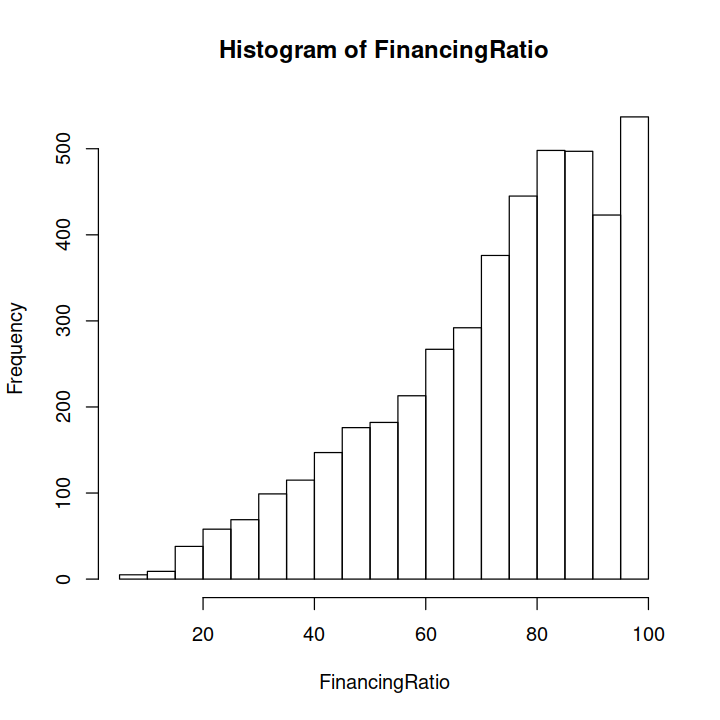

In [28]:
FinancingRatio <- 100*AmountRequested/MarketPrice

hist(FinancingRatio)

 Saving capacity (continuous)

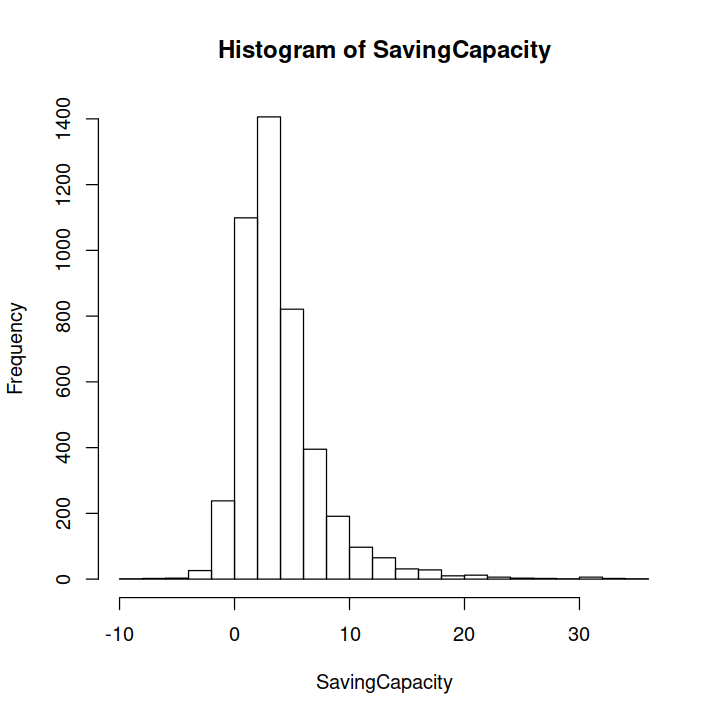

In [29]:
SavingCapacity <- (Income-Expenses-(ChargesOnCapital/100))/(AmountRequested/Deadline)

hist(SavingCapacity, breaks=16)

 Amount Requested greater than the median by people younger than 1.25 times the mean (categorical):

In [30]:
Dubious <- rep("No", nrow(Credit))
Dubious[AmountRequested > median(AmountRequested, na.rm = TRUE) & Age < 1.25*mean (Age, na.rm = TRUE)] <- "Yes"
Dubious <- as.factor(Dubious)

table(Dubious,Assessment)

       Assessment
Dubious positive negative
    No      2200      668
    Yes      997      581

***
## SECTION 6: WHAT WE HAVE DONE SO FAR


 Create a new dataframe that gathers everything and inspect it again

In [31]:
Credit.new <- data.frame(Assessment,YearsInJob,Housing,Deadline,Age,
                         MaritalStatus,Records,TypeOfJob,Expenses,
                         Income,Capital,ChargesOnCapital,
                         AmountRequested,MarketPrice,
                         FinancingRatio,SavingCapacity,Dubious)
                   
summary(Credit.new)
dim(Credit.new)

    Assessment     YearsInJob        Housing        Deadline    
 positive:3197   Min.   : 0.000   rent   : 973   Min.   : 6.00  
 negative:1249   1st Qu.: 2.000   owner  :2106   1st Qu.:36.00  
                 Median : 5.000   private: 246   Median :48.00  
                 Mean   : 7.991   ignore :  20   Mean   :46.45  
                 3rd Qu.:12.000   parents: 782   3rd Qu.:60.00  
                 Max.   :48.000   other  : 319   Max.   :72.00  
      Age         MaritalStatus  Records            TypeOfJob   
 Min.   :18.00   single  : 973   no :3677   indefinite   :2803  
 1st Qu.:28.00   married :3238   yes: 769   temporal     : 451  
 Median :36.00   widower :  67              self-employed:1021  
 Mean   :37.08   split   : 130              other        : 171  
 3rd Qu.:45.00   divorced:  38                                  
 Max.   :68.00                                                  
    Expenses         Income         Capital       ChargesOnCapital 
 Min.   : 35.0   Min. 

[1] 4446   17

In [32]:
# this undoes the attach (recommended)
detach(Credit)   

In [33]:
attach(Credit.new)
is.factor(Credit.new[,1])

The following objects are masked _by_ .GlobalEnv:

    Assessment, Capital, ChargesOnCapital, Dubious, FinancingRatio,
    Housing, Income, MaritalStatus, Records, SavingCapacity, TypeOfJob



[1] TRUE

***
## SECTION 7: GAUSSIANITY AND TRANSFORMATIONS


 Perform a graphical summary of some of the variables (both categorical and continuous), using the boxplot() and hist() procedures

 For continuous data:
 histograms and boxplots

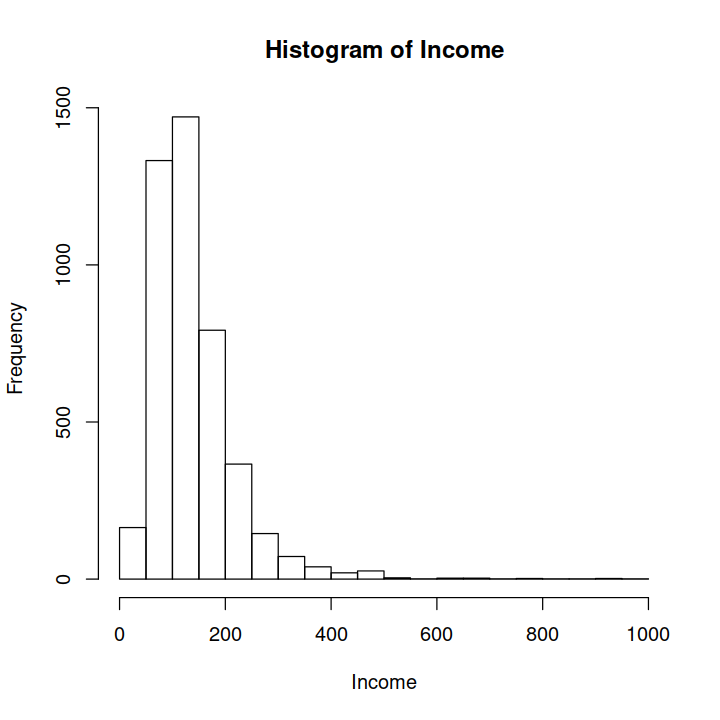

In [34]:
hist(Income)

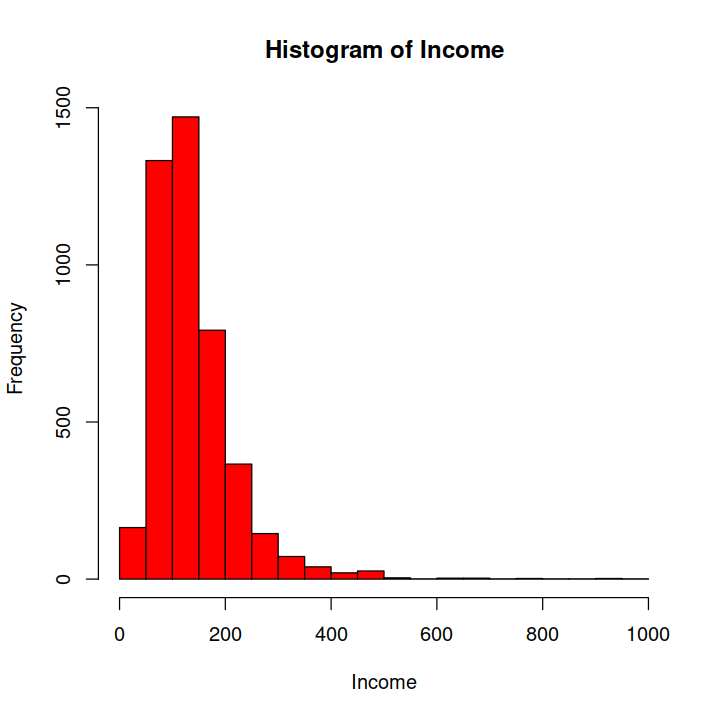

In [35]:
hist(Income,col=2)

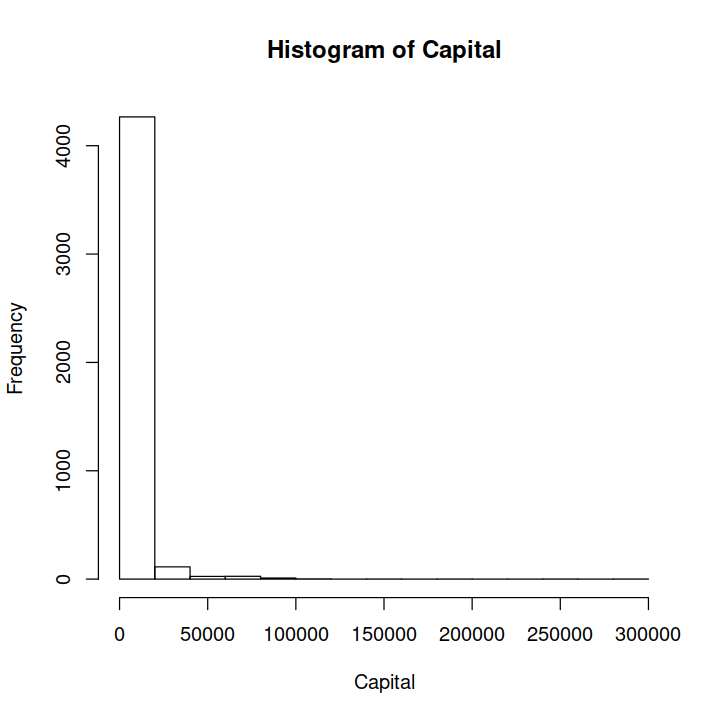

In [36]:
hist(Capital)

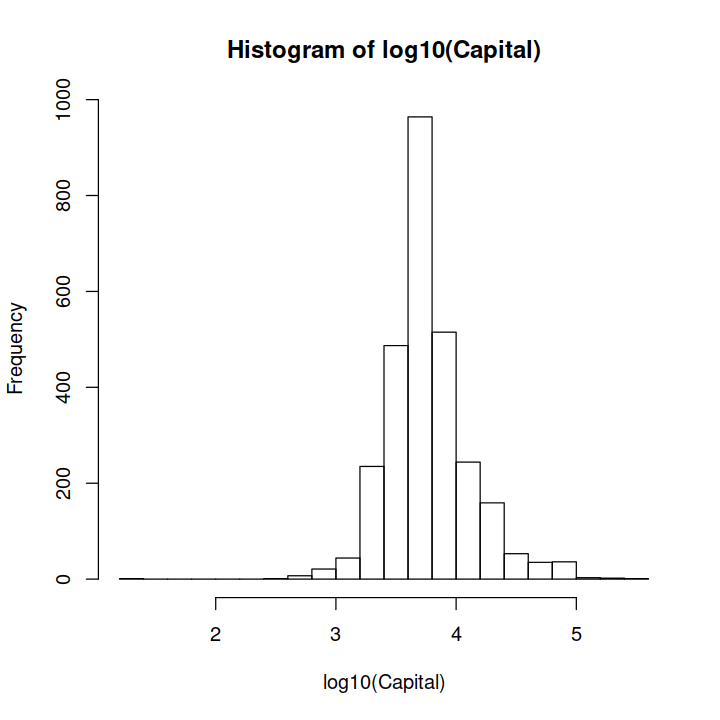

In [37]:
hist(log10(Capital), breaks=20)

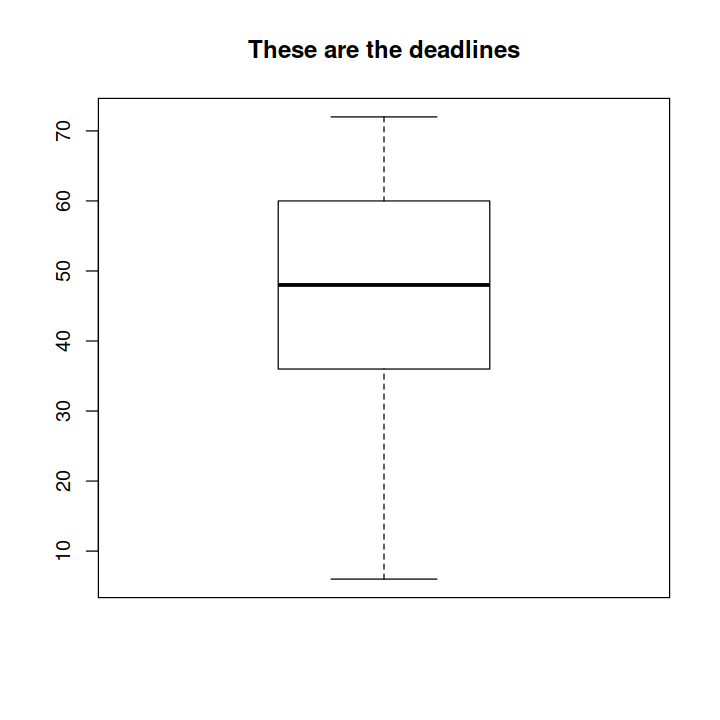

In [38]:
boxplot (Deadline)
title ("These are the deadlines")

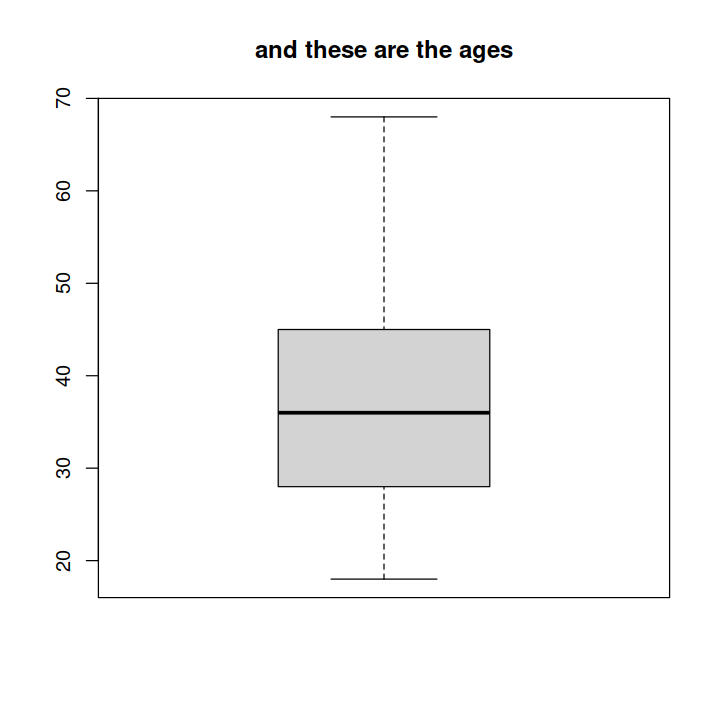

In [39]:
boxplot (Age, col = "lightgray")
title ("and these are the ages")

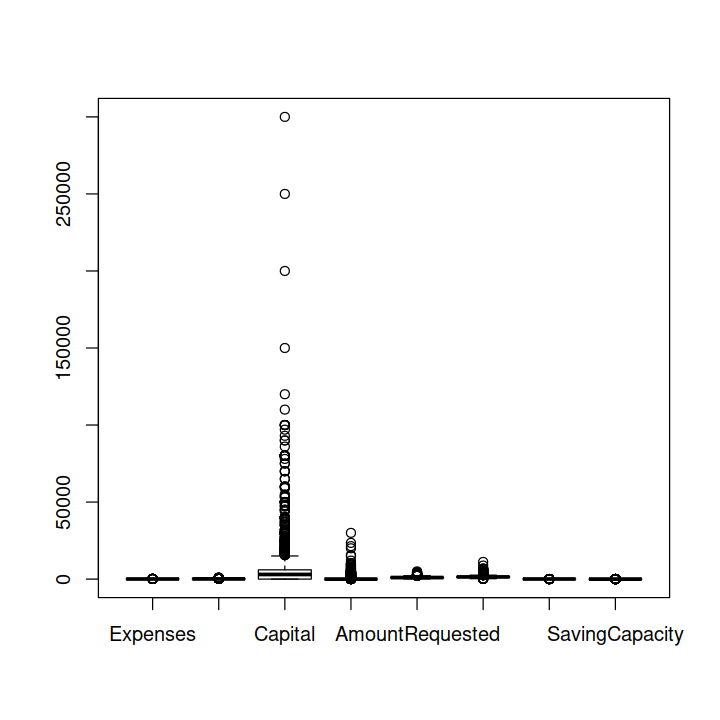

In [40]:
boxplot(Credit.new[,9:16], outline=TRUE) 

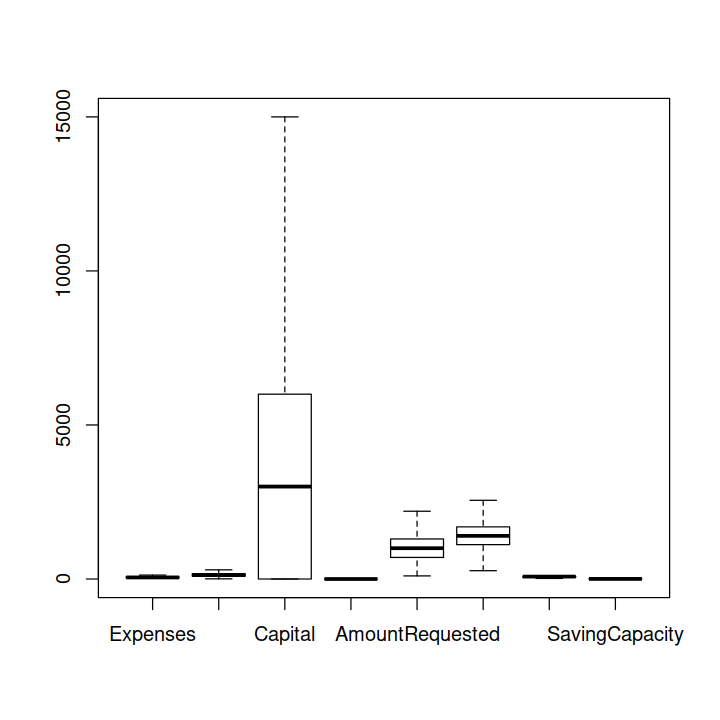

In [41]:
boxplot(Credit.new[,9:16], outline=FALSE) # much better, but would be nicer one by one

 the previous plots suggest to take logs on some variables: Capital and ChargesOnCapital (we'll do it later)

 For categorical data:
 Frequency tables, Contingency tables, Bar charts, Pie charts

 should we treat Age as categorical? probably not

In [42]:
table(Age)                            

Age
 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37 
  8  28  49  82 112 127 152 141 163 153 178 131 156 153 159 141 155 120 145 142 
 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57 
135 126 139 114 112  93  78  88  95  89  60  90  81  83  82  70  58  65  48  31 
 58  59  60  61  62  63  64  65  66  68 
 40  34  34  27  20  22  14  12   9   2 

In [43]:
min(Age)                                                          
max(Age)                                                          

[1] 18

[1] 68

In [44]:
# WARNING! we are generating NAs 
Age.cat <- cut(Age, breaks = seq(30, 90, 10))               
Age.cat[1:20]

[1] <NA>    (50,60] (40,50] <NA>    <NA>    (30,40] (40,50] <NA>    (30,40]
[10] (40,50] (30,40] <NA>    <NA>    (30,40] <NA>    (60,70] (50,60] (60,70]
[19] (30,40] (30,40]
Levels: (30,40] (40,50] (50,60] (60,70] (70,80] (80,90]

In [45]:
Age.cat <- cut(Age, breaks = seq(15, 75, 10))   

In [46]:
Age.tab <- table(Age.cat)                              
Age.tab

Age.cat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] 
    699    1509    1172     773     282      11 

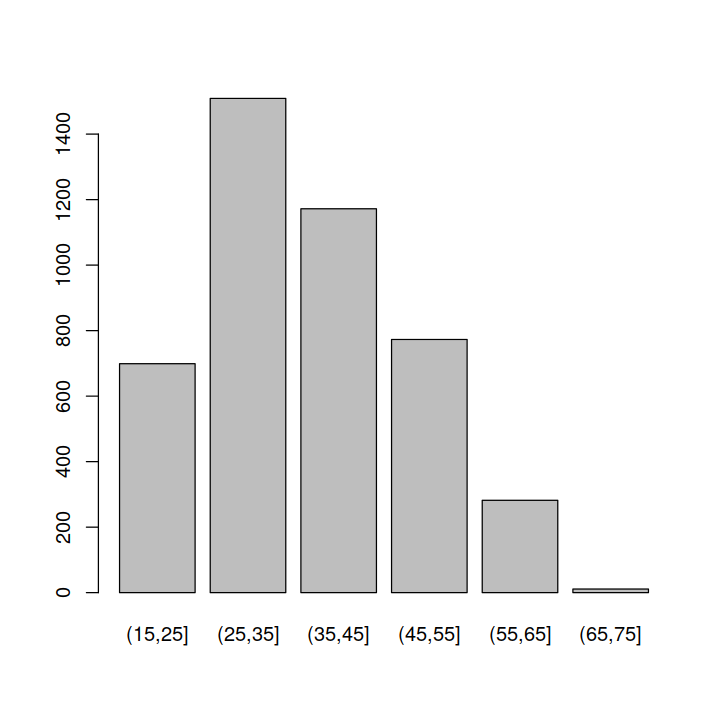

In [47]:
barplot(Age.tab) # bar chart

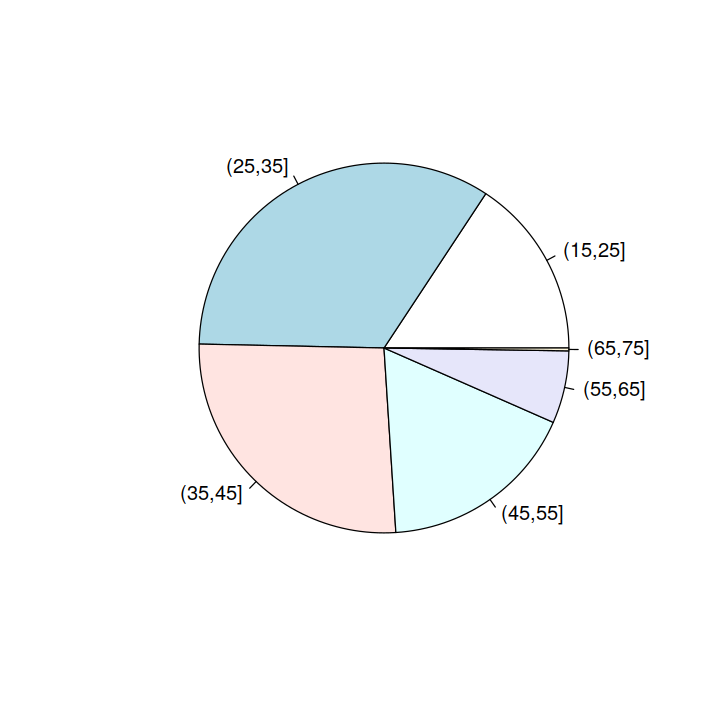

In [48]:
pie(Age.tab) # pie chart

 incidentally, this is how we could generate another new variable based on Age:

In [49]:
Age2.cat <- factor(as.integer(Age < 55))        
levels(Age2.cat) <- c("over55","under55")

In [50]:
# contingency table
TypeOfJob.Age <- table(TypeOfJob, Age.cat)          
TypeOfJob.Age

               Age.cat
TypeOfJob       (15,25] (25,35] (35,45] (45,55] (55,65] (65,75]
  indefinite        408    1054     742     463     132       4
  temporal          183     155      81      30       2       0
  self-employed      91     272     319     250      87       2
  other              17      28      30      30      61       5

In [51]:
margin.table(TypeOfJob.Age, 1) # row sums
margin.table(TypeOfJob.Age, 2) # column sums

TypeOfJob
   indefinite      temporal self-employed         other 
         2803           451          1021           171 

Age.cat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] 
    699    1509    1172     773     282      11 

In [52]:
prop.table(TypeOfJob.Age) # relative frequencies

               Age.cat
TypeOfJob            (15,25]      (25,35]      (35,45]      (45,55]
  indefinite    0.0917678812 0.2370670265 0.1668915879 0.1041385515
  temporal      0.0411605938 0.0348627980 0.0182186235 0.0067476383
  self-employed 0.0204678363 0.0611785875 0.0717498875 0.0562303194
  other         0.0038236617 0.0062977958 0.0067476383 0.0067476383
               Age.cat
TypeOfJob            (55,65]      (65,75]
  indefinite    0.0296896086 0.0008996851
  temporal      0.0004498426 0.0000000000
  self-employed 0.0195681511 0.0004498426
  other         0.0137201979 0.0011246064

In [53]:
round(prop.table(TypeOfJob.Age), digits=3) # idem, rounded to 3 digits

               Age.cat
TypeOfJob       (15,25] (25,35] (35,45] (45,55] (55,65] (65,75]
  indefinite      0.092   0.237   0.167   0.104   0.030   0.001
  temporal        0.041   0.035   0.018   0.007   0.000   0.000
  self-employed   0.020   0.061   0.072   0.056   0.020   0.000
  other           0.004   0.006   0.007   0.007   0.014   0.001

In [54]:
round(prop.table(TypeOfJob.Age) * 100, digits=3) # total percentages

               Age.cat
TypeOfJob       (15,25] (25,35] (35,45] (45,55] (55,65] (65,75]
  indefinite      9.177  23.707  16.689  10.414   2.969   0.090
  temporal        4.116   3.486   1.822   0.675   0.045   0.000
  self-employed   2.047   6.118   7.175   5.623   1.957   0.045
  other           0.382   0.630   0.675   0.675   1.372   0.112

In [55]:
# table of relative frequencies (row-wise)
round(prop.table(TypeOfJob.Age, 1), digits=3)   
# table of relative frequencies (column-wise)
TypeOfJob.Age.rel <- round(prop.table(TypeOfJob.Age, 2), digits=3)      

               Age.cat
TypeOfJob       (15,25] (25,35] (35,45] (45,55] (55,65] (65,75]
  indefinite      0.146   0.376   0.265   0.165   0.047   0.001
  temporal        0.406   0.344   0.180   0.067   0.004   0.000
  self-employed   0.089   0.266   0.312   0.245   0.085   0.002
  other           0.099   0.164   0.175   0.175   0.357   0.029

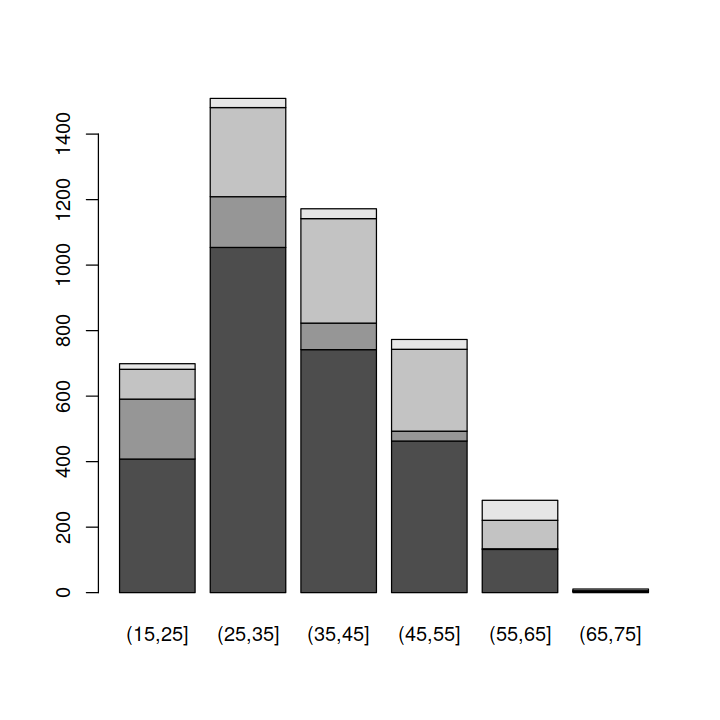

In [56]:
barplot(TypeOfJob.Age) # basic stacked bar chart

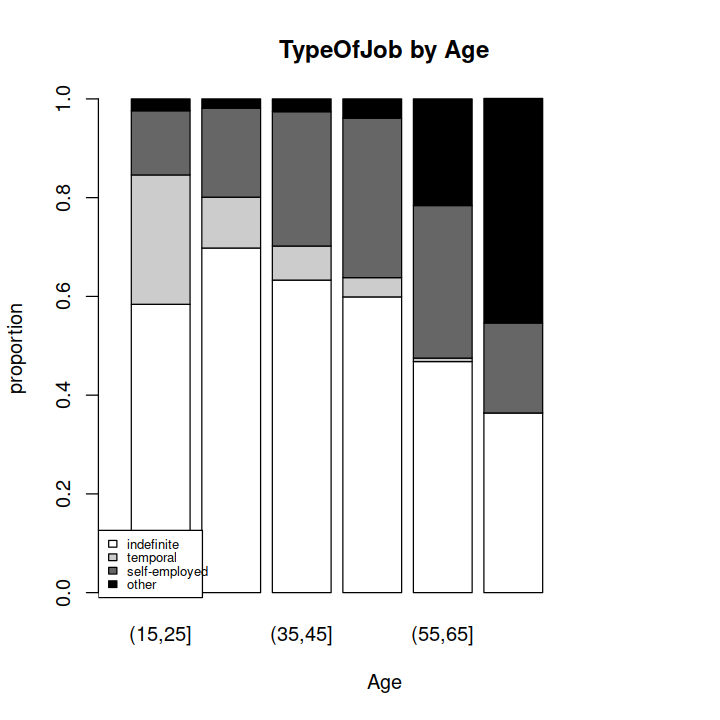

In [57]:
barplot(TypeOfJob.Age.rel, yaxt="n", xlab="Age", ylab="proportion", 
        col = c("white", "grey80", "grey40", "black"), 
        main = "TypeOfJob by Age", xlim=c(0,9)) # stacked bar chart

legend("bottomleft", legend=rownames(TypeOfJob.Age.rel), col="black", 
      fill = c("white", "grey80", "grey40", "black"), cex=0.65)

axis(2, at=seq(0, 1, 0.2))

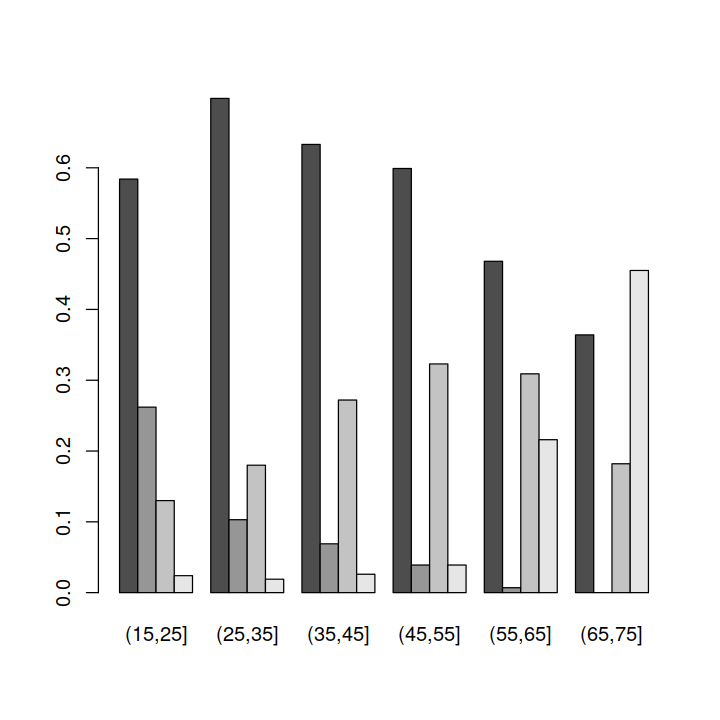

In [58]:
barplot(TypeOfJob.Age.rel, beside = TRUE) # grouped bar chart

 we can perform graphical comparisons between some pairs of variables (both categorical and continuous), using the plot(),  pairs() and identify() procedures

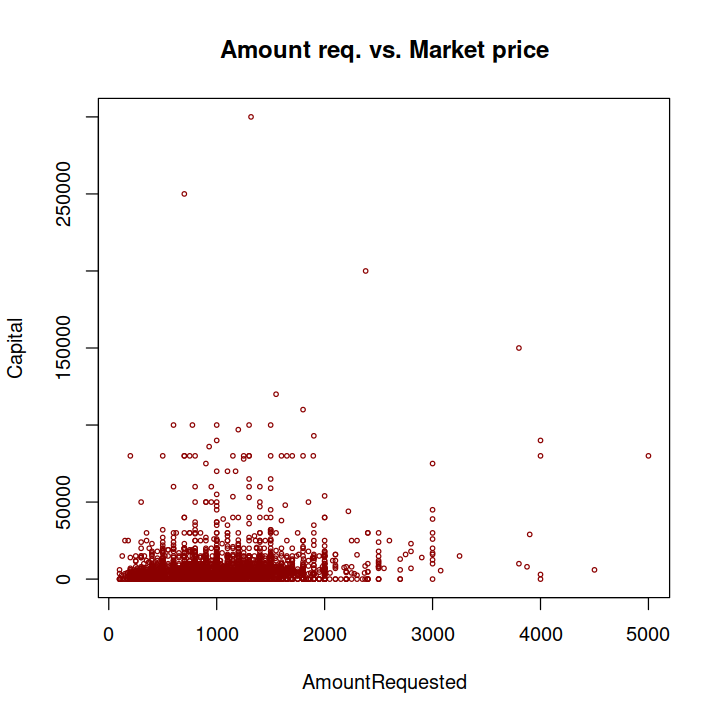

In [59]:
plot (AmountRequested, Capital, main = "Amount req. vs. Market price", 
      cex = .5, col = "dark red")

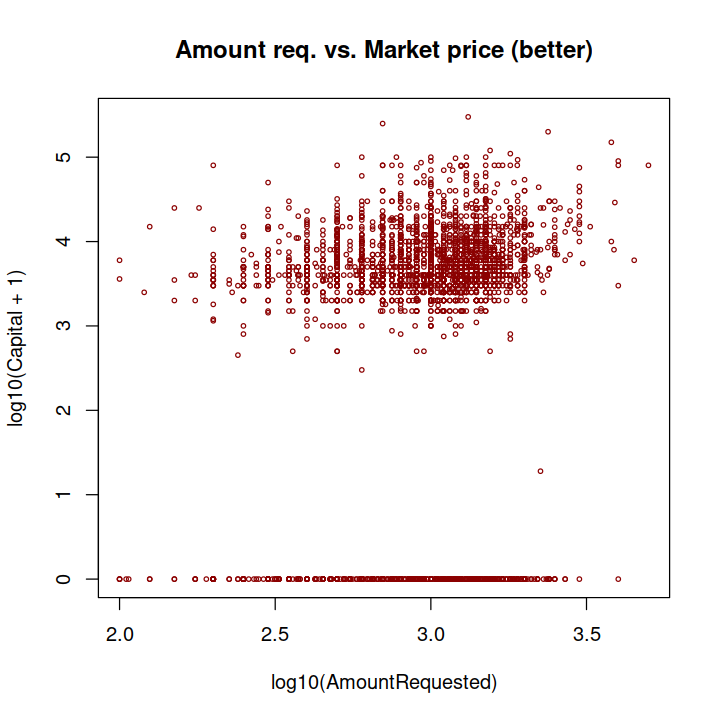

In [60]:
plot (log10(AmountRequested), log10(Capital+1), 
      main = "Amount req. vs. Market price (better)", cex = .5, col = "dark red")

 adding a center (dashed) and a regression line (blue)

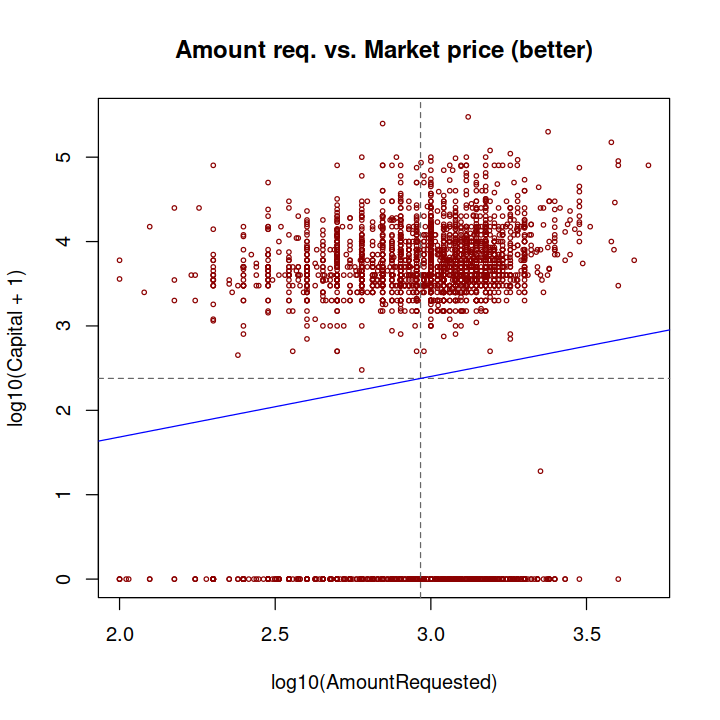

In [61]:
plot (log10(AmountRequested), log10(Capital+1), 
      main = "Amount req. vs. Market price (better)", cex = .5, col = "dark red")
abline(v = mean(log10(AmountRequested)), lty = 2, col = "grey40")
abline(h = mean(log10(Capital+1)), lty = 2, col = "grey40")
abline(lm(log10(Capital+1) ~ log10(AmountRequested)), col = "blue")

 (note that log10(x+1)=0 for x=0, so our transformation keeps the zeros)
     
 On the other hand, these same zeros spoil the regression: perhaps it would be more sensible to do the regression without them

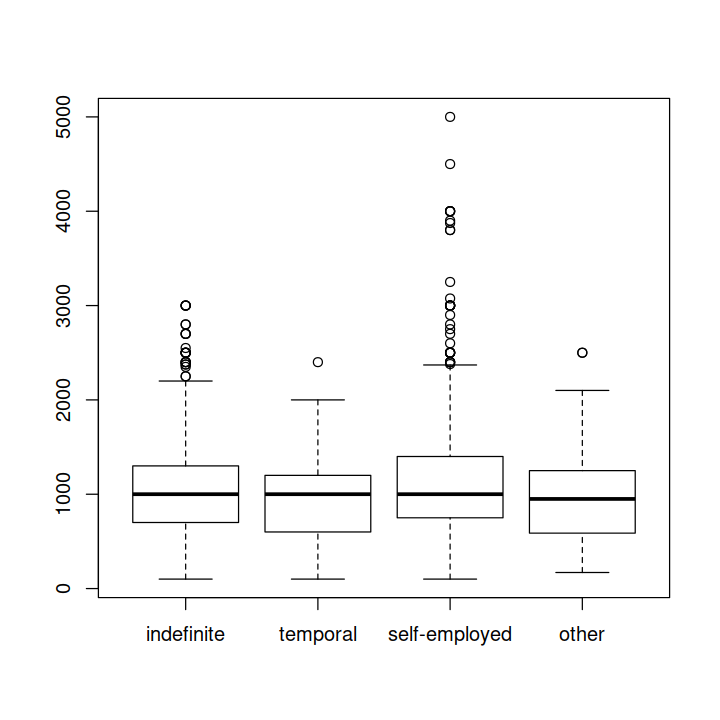

In [62]:
par(mfrow=c(1,1))

plot (TypeOfJob, AmountRequested)

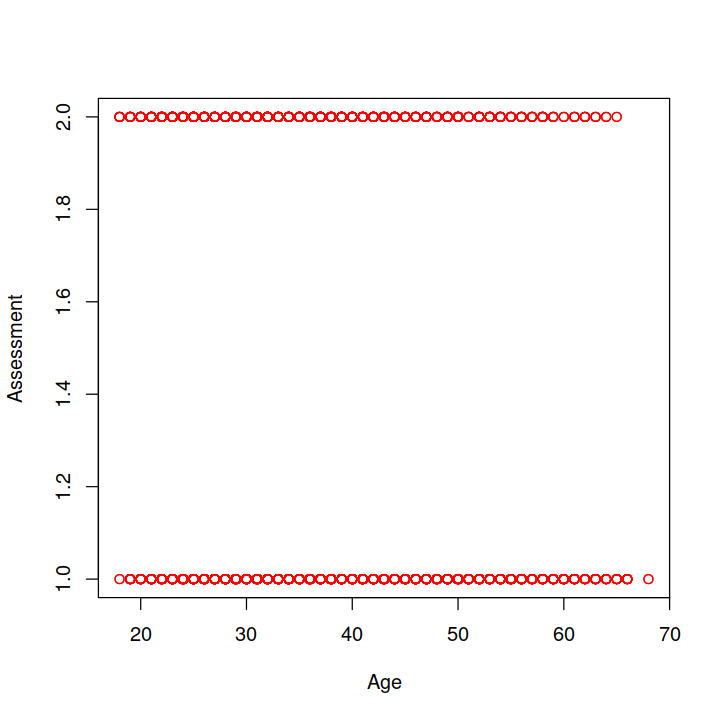

In [63]:
plot (Age,Assessment, col="red") # WARNING!

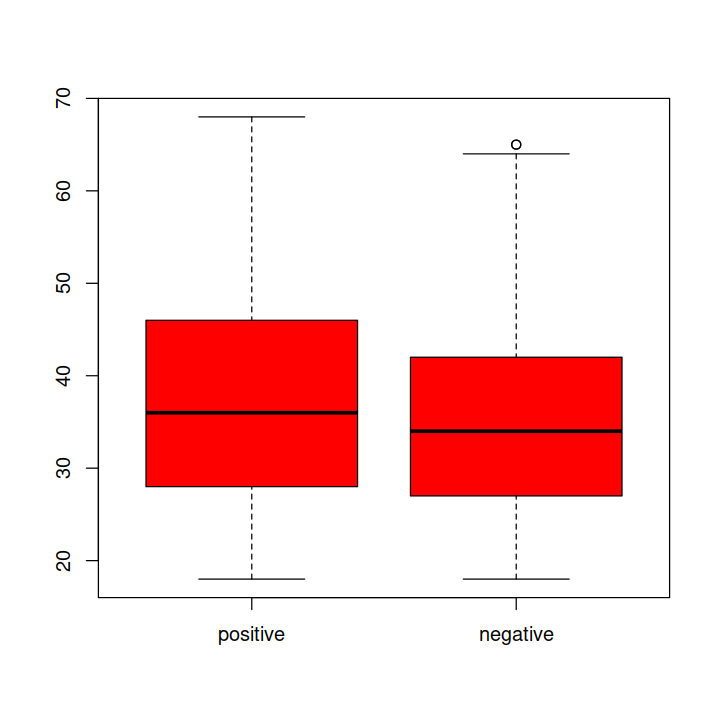

In [64]:
plot (Assessment, Age, col="red") # better

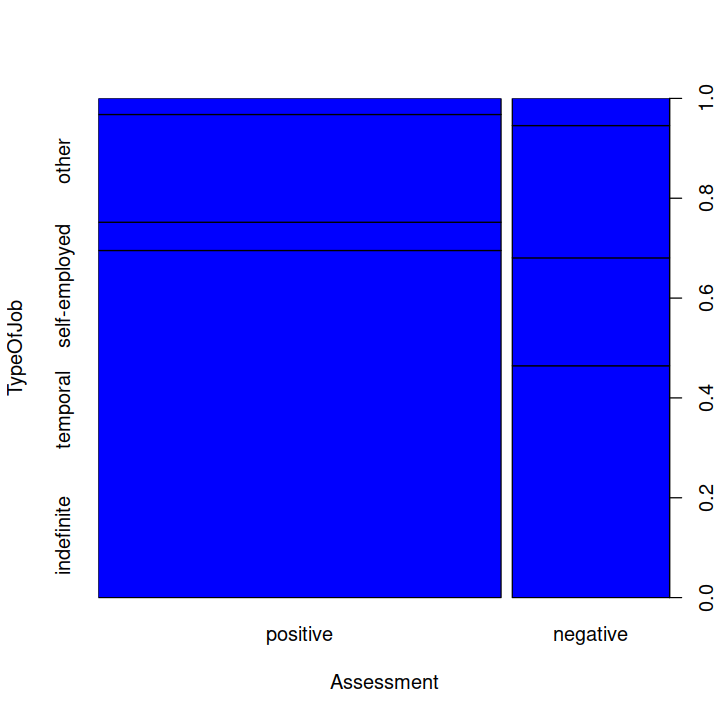

In [65]:
plot (Assessment, TypeOfJob,col="blue", xlab="Assessment",ylab="TypeOfJob")

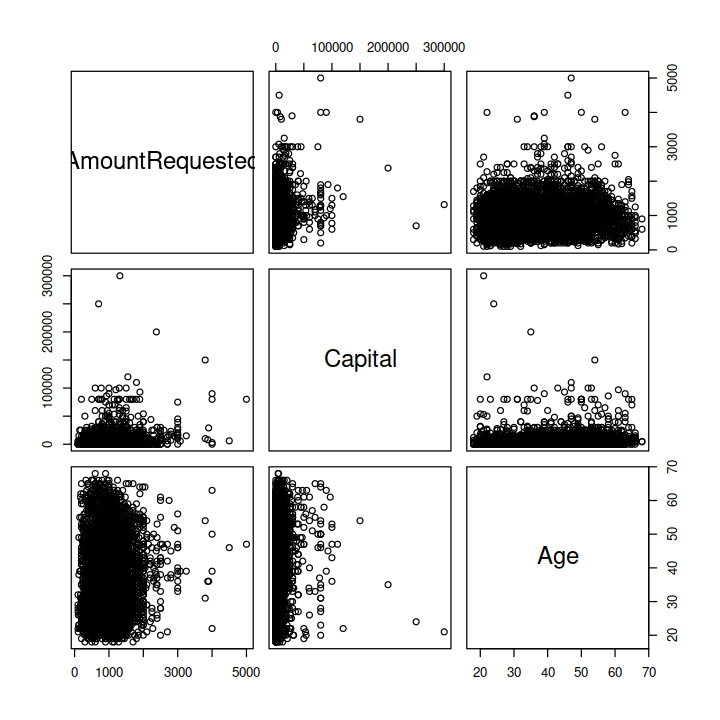

In [66]:
pairs(~ AmountRequested + Capital + Age)

 Plotting a variable against the normal pdf in red

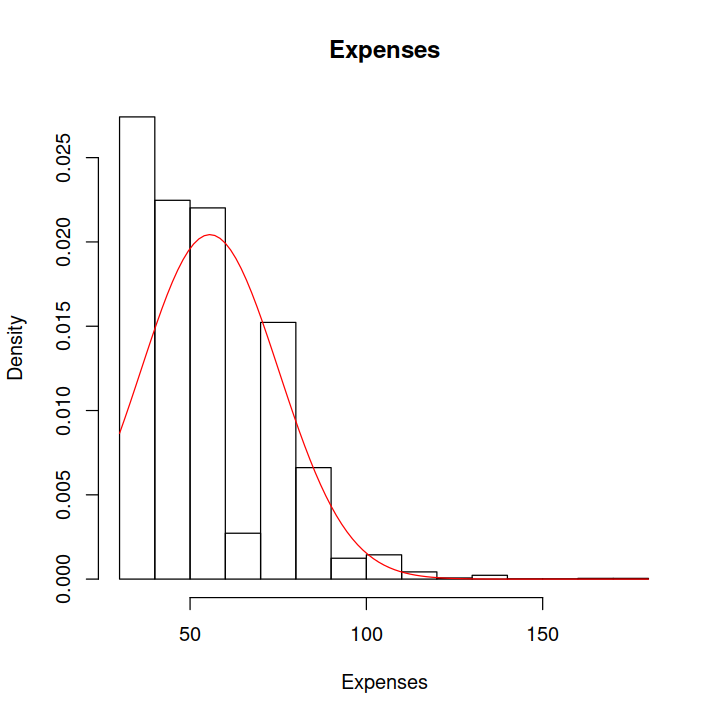

In [67]:
hist.with.normal <- function (x, main, xlabel=deparse(substitute(x)), ...)
{
  h <- hist(x,plot=F, ...)
  s <- sd(x)
  m <- mean(x)
  ylim <- range(0,h$density,dnorm(0,sd=s))
  hist(x,freq=FALSE,ylim=ylim,xlab=xlabel, main=main, ...)
  curve(dnorm(x,m,s),add=T,col="red")
}

hist.with.normal (Expenses, "Expenses")

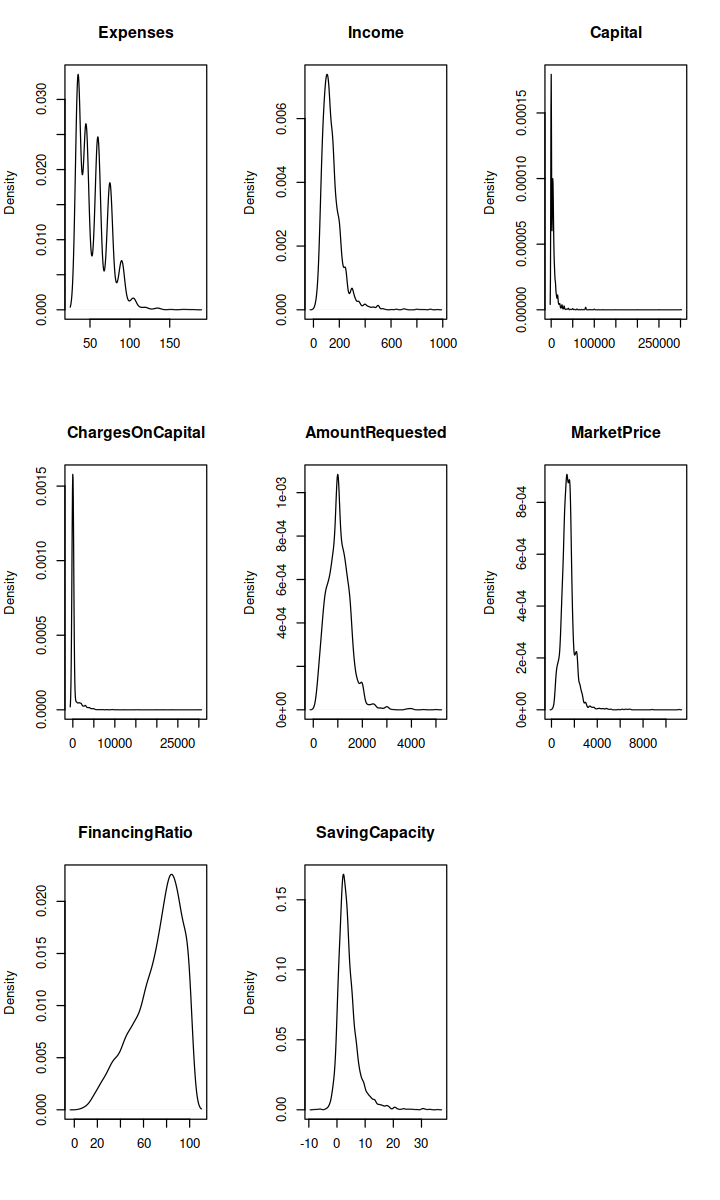

In [68]:
options(repr.plot.width=6, repr.plot.height=10)
par(mfrow=c(3,3))
for (i in 0:7) 
  { plot(density(Credit.new[,i+9]), xlab="", 
         main=names(Credit.new)[i+9]) 
  }

 do any of the continuous variables "look" Gaussian? 
 features to look for in comparing to a Gaussian: outliers, asymmetries, long tails

 A useful tool for "Gaussianization" is the Box-Cox power transformation

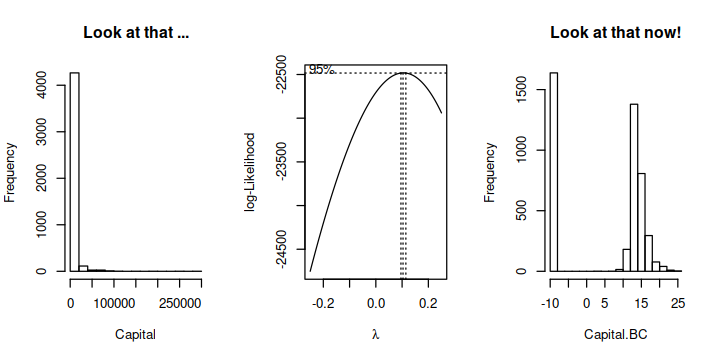

In [69]:
options(repr.plot.width=6, repr.plot.height=3)
library(MASS)

par(mfrow=c(1,3))

hist(Capital, main="Look at that ...")

bx <- boxcox(I(Capital+1) ~ . - Assessment, data = Credit.new,
             lambda = seq(-0.25, 0.25, length = 10))

lambda <- bx$x[which.max(bx$y)]

Capital.BC <- (Capital^lambda - 1)/lambda

hist(Capital.BC, main="Look at that now!")

par (mfrow=c(1,1))

*** 

## SECTION 8: ENDING THE PREPROCESSING

  
 Shuffle the data (to avoid possible ordering biases)

In [70]:
set.seed (104)
Credit.new <- Credit.new[sample.int(nrow(Credit.new)),]

 
 Save the preprocessed data into a file for future use
<div class="alert alert-block alert-warning">
 WARNING! This creates a .Rdata file (binary and gzip compressed)
 This is very convenient, but the file cannot be opened with a text editor
  If you want a text file, set 'ascii'=TRUE 
</div>


In [71]:
save(Credit.new, file = "Credsco-processed.Rdata")

 remove (almost) everything in the working environment

In [72]:
rm(list = ls())

load("Credsco-processed.Rdata")
objects()

[1] "Credit.new"